# Autoencoder

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [4]:
x_train = np.reshape(x_train, (len(x_train), -1))
x_test = np.reshape(x_test, (len(x_test), -1))

In [5]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [6]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [7]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.2850 - val_loss: 0.2551
Epoch 2/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.2463 - val_loss: 0.2385
Epoch 3/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.2299 - val_loss: 0.2210
Epoch 4/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.2129 - val_loss: 0.2061
Epoch 5/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.2011 - val_loss: 0.1934
Epoch 6/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.1898 - val_loss: 0.1851
Epoch 7/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.1828 - val_loss: 0.1790
Epoch 8/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.1756 - val_loss: 0.1695
Epoch 9/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.1699 - val_loss: 0.1

60000/60000 [==============================] - 4s 65us/step - loss: 0.1184 - val_loss: 0.1208
Epoch 78/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1182 - val_loss: 0.1208
Epoch 79/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.1180 - val_loss: 0.1205
Epoch 80/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1179 - val_loss: 0.1188
Epoch 81/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1177 - val_loss: 0.1201
Epoch 82/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.1175 - val_loss: 0.1205
Epoch 83/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.1175 - val_loss: 0.1197
Epoch 84/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.1173 - val_loss: 0.1206
Epoch 85/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.1171 - val_loss: 0.1203
Epoch 86/100
60000/60000 [=======================

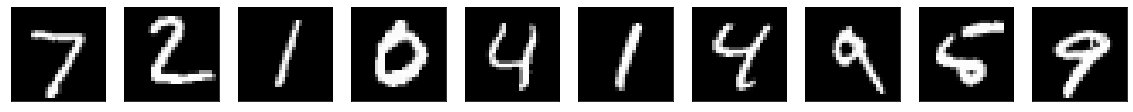

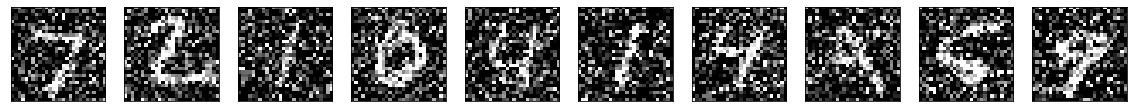

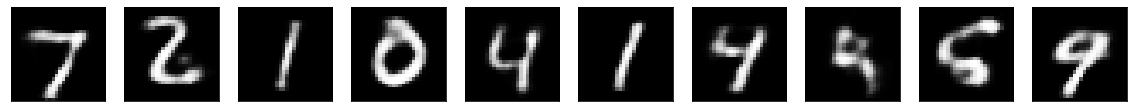

In [8]:
n = 10

plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

autoencoder_result = autoencoder.predict(x_test_noisy)

plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(autoencoder_result[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
'''
plus = 20
for n in range(0, len(x_test), plus):
    plt.figure(figsize=(20, 2))
    for i in range(plus):
        ax = plt.subplot(1, plus, i + 1)
        plt.imshow(x_test[n + i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

    autoencoder_result = autoencoder.predict(x_test)

    plt.figure(figsize=(20, 2))
    for i in range(plus):
        ax = plt.subplot(1, plus, i + 1)
        plt.imshow(autoencoder_result[n + i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
    print('=============================='
          '=============================='
          '==============================')
'''

"\nplus = 20\nfor n in range(0, len(x_test), plus):\n    plt.figure(figsize=(20, 2))\n    for i in range(plus):\n        ax = plt.subplot(1, plus, i + 1)\n        plt.imshow(x_test[n + i].reshape(28, 28))\n        plt.gray()\n        ax.get_xaxis().set_visible(False)\n        ax.get_yaxis().set_visible(False)\n    plt.show()\n\n    autoencoder_result = autoencoder.predict(x_test)\n\n    plt.figure(figsize=(20, 2))\n    for i in range(plus):\n        ax = plt.subplot(1, plus, i + 1)\n        plt.imshow(autoencoder_result[n + i].reshape(28, 28))\n        plt.gray()\n        ax.get_xaxis().set_visible(False)\n        ax.get_yaxis().set_visible(False)\n    plt.show()\n    \n    print('=============================='\n          '=============================='\n          '==============================')\n"

# MLP

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import time
import numpy as np

In [11]:
start1 = time.time()
mlp = MLPClassifier(random_state=12, hidden_layer_sizes=[50, 100, 50], max_iter=100, alpha=0.001, solver='sgd', verbose=10, tol=0.000000001)
mlp.fit(x_train, y_train)
print("Training time: "+ str(time.time() - start1))

Iteration 1, loss = 1.99132466
Iteration 2, loss = 0.95365180
Iteration 3, loss = 0.53645713
Iteration 4, loss = 0.42867261
Iteration 5, loss = 0.38163231
Iteration 6, loss = 0.35289176
Iteration 7, loss = 0.33159978
Iteration 8, loss = 0.31448582
Iteration 9, loss = 0.29971291
Iteration 10, loss = 0.28682688
Iteration 11, loss = 0.27589484
Iteration 12, loss = 0.26558372
Iteration 13, loss = 0.25628567
Iteration 14, loss = 0.24765820
Iteration 15, loss = 0.23998460
Iteration 16, loss = 0.23260784
Iteration 17, loss = 0.22626592
Iteration 18, loss = 0.21969974
Iteration 19, loss = 0.21384664
Iteration 20, loss = 0.20823146
Iteration 21, loss = 0.20297204
Iteration 22, loss = 0.19790213
Iteration 23, loss = 0.19293529
Iteration 24, loss = 0.18851836
Iteration 25, loss = 0.18446120
Iteration 26, loss = 0.18013572
Iteration 27, loss = 0.17594078
Iteration 28, loss = 0.17203301
Iteration 29, loss = 0.16858323
Iteration 30, loss = 0.16503957
Iteration 31, loss = 0.16162423
Iteration 32, los

C:\Users\KSY\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [12]:
start2 = time.time()
print("Training accuracy : {:.3f}".format(mlp.score(x_train, y_train)))
print("Training accuracy calculate time: " + str(time.time() - start2))

start3 = time.time()
print("Testing accuracy : {:.3f}".format(mlp.score(x_test, y_test)))
print("Testing accuracy calculate time: " + str(time.time() - start3))

Training accuracy : 0.982
Training accuracy calculate time: 0.749352216720581
Testing accuracy : 0.969
Testing accuracy calculate time: 0.12266969680786133


# Test code

Original answer: 3
After autoencoder answer: 3
Real answer: 3


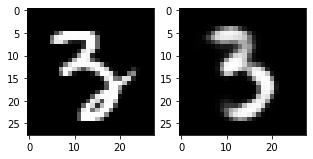

In [13]:
num = 87
data = x_test[num]
data = np.reshape(data, (1, 784))
res = mlp.predict(data)
print("Original answer: {0}".format(res[0]))
autoencoder_result = autoencoder.predict(data)
res = mlp.predict(autoencoder_result)
print("After autoencoder answer: {0}".format(res[0]))
print("Real answer: {0}".format(y_test[num]))

plt.figure(figsize=(5, 5))
ax = plt.subplot(1, 2, 1)
plt.imshow(data.reshape(28, 28))
ax = plt.subplot(1, 2, 2)
plt.imshow(autoencoder_result.reshape(28, 28))

# Accuracy - all test data

In [14]:
autoencoder_result = autoencoder.predict(x_test)
print("Original accuracy : {:.3f}".format(mlp.score(x_test, y_test)))
print("After autoencoder accuracy : {:.3f}".format(mlp.score(autoencoder_result, y_test)))

Original accuracy : 0.969
After autoencoder accuracy : 0.942


# Accuracy - ambiguous data small amount

In [15]:
num = 47
data = x_test[num]
data = np.reshape(data, (1, 784))
x_ambiguous_data = data

In [16]:
for num in (87, 117, 121, 151, 167, 175, 193, 195, 211, 221, 241, 242, 244, 247, 259, 319, 324, 340, 358, 415, 445, 447, 448, 449, 532, 544, 559, 582, 659):
    data = x_test[num]
    data = np.reshape(data, (1, 784))
    x_ambiguous_data = np.append(x_ambiguous_data, data, axis=0)

In [17]:
num = 47
y_ambiguous_data = y_test[num]
for num in (87, 117, 121, 151, 167, 175, 193, 195, 211, 221, 241, 242, 244, 247, 259, 319, 324, 340, 358, 415, 445, 447, 448, 449, 532, 544, 559, 582, 659):
        y_ambiguous_data = np.append(y_ambiguous_data, y_test[num])

In [18]:
autoencoder_result = autoencoder.predict(x_ambiguous_data)
print("Original accuracy : {:.3f}".format(mlp.score(x_ambiguous_data, y_ambiguous_data)))
print("After autoencoder accuracy : {:.3f}".format(mlp.score(autoencoder_result, y_ambiguous_data)))

Original accuracy : 0.800
After autoencoder accuracy : 0.767
